In [1]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
mydir = "C:\\Users\\Yang\\Desktop\\영진\\학회.동아리\\Growth Hackers\\
경마프로젝트\\DB\\"
crawldata = "crawling data.csv"
# predict = "prediction.csv"
df = pd.read_csv(mydir+crawldata,engine = 'python', index_col = 0,encoding='utf-8')
# df = pd.read_csv(mydir + predict,engine = 'python', index_col = 0,encoding='utf-8')


In [3]:
print(df.columns)
data = df[['date','round','location','rank','dandivi','yeondivi','lane']]


Index(['url_x', 'date', 'round', 'name', 'code', 'rank', 'lane', 'sex', 'age',
       'jockey_w', 'rating', 'jockey', 'difference', 'weight', 'dandivi',
       'yeondivi', 's1fr', 'c1r', 'c2r', 'c3r', 'c4r', 'g1fr', 's1f', 'c1',
       'c2', 'c3', 'c4', 'g3f', 'g1f', 'record', 'Unnamed: 0_y', 'url_y',
       'weather', 'humidity', 'level', 'distance', 'dan', 'yeon1', 'yeon2',
       'yeon3', 'bok', 'ssang', 'bokyeon1', 'bokyeon2', 'bokyeon3', 'sambok',
       'samssang', 'horses', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8',
       'h9', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'location'],
      dtype='object')


In [4]:
gb_data = data.groupby(['date','round','location'])
gb_data = [gb_data.get_group(x) for x in gb_data.groups]

gb_data[0]

,date,round,location,rank,dandivi,yeondivi,lane
0,20170729,1,0,1,2.5,1.1,7
1,20170729,1,0,2,12.4,2.9,8
2,20170729,1,0,3,16.5,3.9,2
3,20170729,1,0,4,5.9,1.9,6
4,20170729,1,0,5,4.9,1.6,3
5,20170729,1,0,6,12.6,3.6,4
6,20170729,1,0,7,112.3,17.3,12
7,20170729,1,0,8,89.5,27.6,5
8,20170729,1,0,9,54.4,9.7,1
9,20170729,1,0,10,4.9,1.8,9


In [25]:
startmoney=10000000
startlist=[]
bettingmoney = 10000
upmoney = 0
for i in range(len(gb_data)):
    top_rank = gb_data[i][gb_data[i]['rank'].rank()==1]
    if len(top_rank)==0:
        continue
#    if int(top_rank.iloc[0]['rank']) == top_rank.iloc[0]['lane']:
    if 1 == top_rank.iloc[0]['lane']:
        upmoney = upmoney + bettingmoney * top_rank.iloc[0]['dandivi']
        startmoney = startmoney + bettingmoney * top_rank.iloc[0]['dandivi']
    startmoney = startmoney - bettingmoney
    startlist.append(startmoney)
    
    if startmoney<0:
        print(i, top_rank.iloc[0]['date'])
        break
        
print('번 돈: ',upmoney)
print('쓴 돈: ',bettingmoney * len(gb_data))



번 돈:  21167000.0
쓴 돈:  25370000


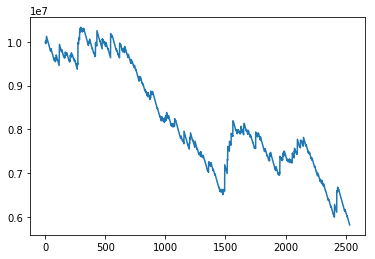

In [28]:
from matplotlib import pyplot as plt
plt.plot(startlist)
plt.show()